In [2]:
# Predictive Task and Evolution Framework

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

In [3]:
# Load the dataset
df = pd.read_csv("data/ClassicHit.csv")

# Inspect the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

* The predictive task will be *genre classification* using provided audio features.
* The target variable is `Genre`, and the features are numerical audio descriptors like `Danceability`, `Energy`, etc.

In [11]:
# Encode target labels
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"])

# Define features (X) and target (y)
X = df[
    [
        "Danceability",
        "Energy",
        "Loudness",
        "Speechiness",
        "Acousticness",
        "Instrumentalness",
        "Liveness",
        "Valence",
        "Tempo",
        "Popularity",
    ]
]
y = df["Genre"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Initialize DummyClassifier (stratified strategy)
dummy_classifier = DummyClassifier(strategy="stratified", random_state=42)
dummy_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_classifier.predict(X_test)

# Evaluate baseline performance
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Baseline DummyClassifier Accuracy: {dummy_accuracy:.4f}")
print("Classification Report for DummyClassifier:")
print(classification_report(y_test, y_pred_dummy, target_names=label_encoder.classes_))

Baseline DummyClassifier Accuracy: 0.0881
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

   Alt. Rock       0.01      0.01      0.01       160
       Blues       0.04      0.05      0.05       129
     Country       0.06      0.06      0.06       160
       Disco       0.02      0.02      0.02       132
         EDM       0.03      0.03      0.03       153
        Folk       0.03      0.02      0.02       130
        Funk       0.02      0.03      0.02        77
      Gospel       0.00      0.00      0.00        69
        Jazz       0.05      0.05      0.05       147
       Metal       0.09      0.09      0.09       179
         Pop       0.24      0.23      0.23       765
        Punk       0.07      0.07      0.07       161
         R&B       0.06      0.07      0.06       152
         Rap       0.06      0.06      0.06       141
      Reggae       0.01      0.01      0.01        79
        Rock       0.03      0.03      0.03       

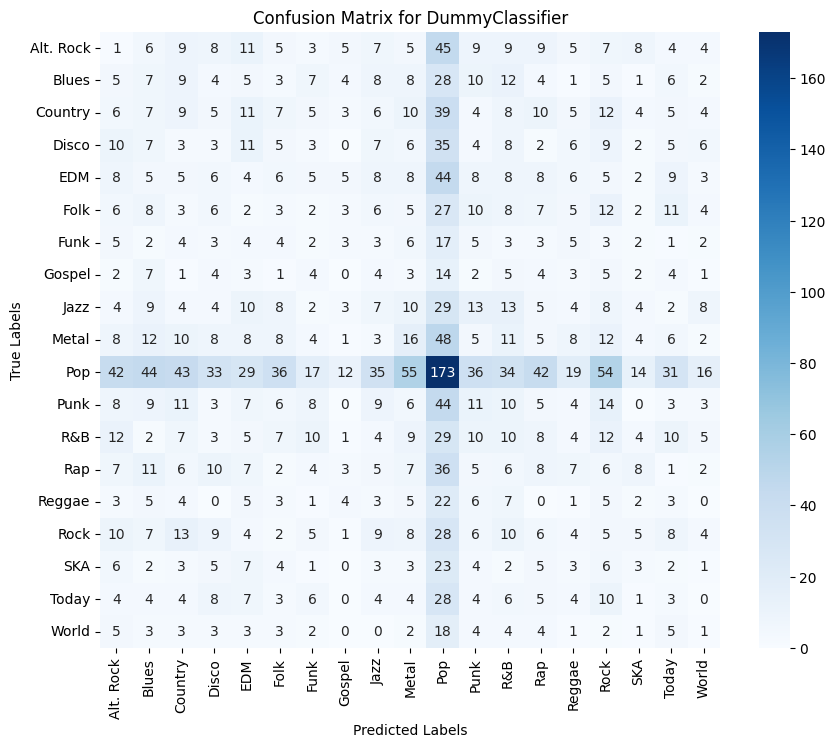

In [13]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for DummyClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Logistic Regression Model

In [22]:
from sklearn import linear_model

allSongs = pd.read_csv("data/ClassicHit.csv")

X = allSongs.drop(columns=["Genre","Track","Artist","Year","Mode","Time_Signature","Key","Duration"])
y = allSongs["Genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

model = linear_model.LogisticRegression(solver='lbfgs', max_iter=20000, random_state=5)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

correct = 0
genrecorrect = {}
for i, actual in enumerate(y_test):
    if actual == y_pred_log[i]:
        correct += 1
        if actual in genrecorrect:
            genrecorrect[actual] += 1
        else:
            genrecorrect[actual] = 1

print(correct / len(y_test))

for genre, correct in genrecorrect.items():
    print(genre + ": ")
    print(str(correct/y_test.value_counts()[genre]*100) + "% accuracy VS " + str(y_test.value_counts()[genre]/len(y_test)*100) + "% genre ratio")

0.3778877887788779
Pop: 
76.29427792915531% accuracy VS 24.224422442244226% genre ratio
Rock: 
36.25% accuracy VS 5.2805280528052805% genre ratio
Rap: 
52.083333333333336% accuracy VS 4.752475247524752% genre ratio
Punk: 
40.397350993377486% accuracy VS 4.983498349834983% genre ratio
Country: 
15.568862275449103% accuracy VS 5.511551155115511% genre ratio
EDM: 
39.285714285714285% accuracy VS 4.62046204620462% genre ratio
Reggae: 
26.136363636363637% accuracy VS 2.9042904290429044% genre ratio
Blues: 
15.328467153284672% accuracy VS 4.521452145214521% genre ratio
Metal: 
51.08695652173913% accuracy VS 6.072607260726072% genre ratio
Jazz: 
41.935483870967744% accuracy VS 5.115511551155116% genre ratio
Alt. Rock: 
6.41025641025641% accuracy VS 5.148514851485149% genre ratio
SKA: 
9.210526315789473% accuracy VS 2.5082508250825084% genre ratio
Disco: 
32.30769230769231% accuracy VS 4.29042904290429% genre ratio
Today: 
12.096774193548388% accuracy VS 4.092409240924092% genre ratio
Funk: 
1

Baseline DummyClassifier Accuracy: 0.3779
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

   Alt. Rock       0.38      0.06      0.11       156
       Blues       0.20      0.15      0.17       137
     Country       0.29      0.16      0.20       167
       Disco       0.27      0.32      0.30       130
         EDM       0.45      0.39      0.42       140
        Folk       0.23      0.22      0.22       115
        Funk       0.25      0.01      0.02        78
      Gospel       0.28      0.11      0.16        62
        Jazz       0.52      0.42      0.46       155
       Metal       0.48      0.51      0.49       184
         Pop       0.37      0.76      0.50       734
        Punk       0.48      0.40      0.44       151
         R&B       0.00      0.00      0.00       164
         Rap       0.59      0.52      0.55       144
      Reggae       0.44      0.26      0.33        88
        Rock       0.31      0.36      0.34       

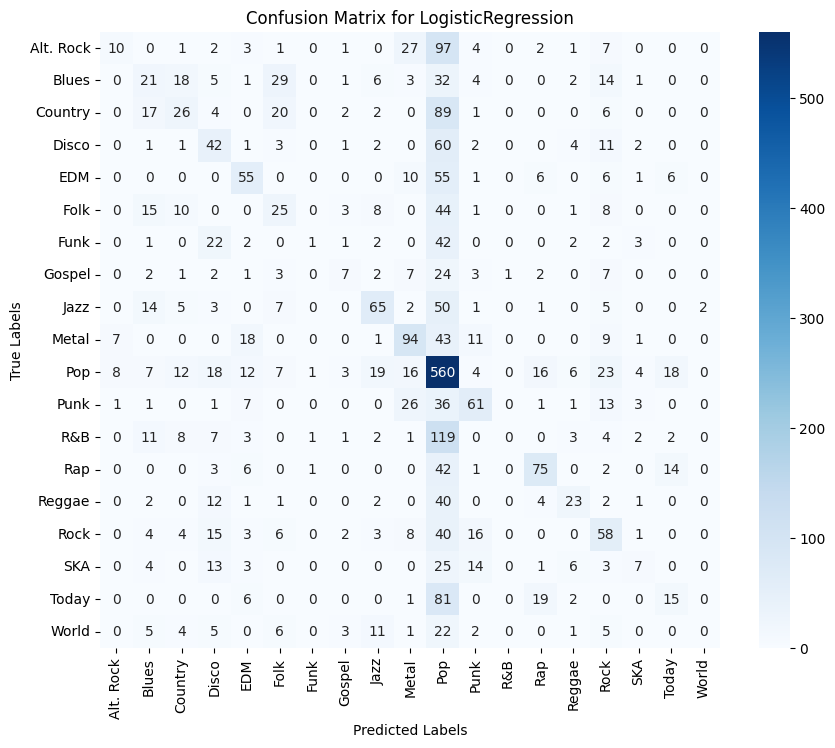

In [25]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Baseline DummyClassifier Accuracy: {log_accuracy:.4f}")
print("Classification Report for DummyClassifier:")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()